In [184]:
import warnings
warnings.simplefilter("ignore")
import csv

In [185]:
%matplotlib inline
import nltk
from sklearn import metrics
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [186]:
training_set = pd.read_excel('WTP.xlsx', sheet_name='2022',header=1)

In [187]:
training_set

,Unnamed: 0,Unnamed: 1,Unnamed: 2,pH,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Dennis Penney
0,Date,Shortcut,Start Time,Raw,PTC,PTC (OL),SWC,Filter,Finish (OL),Finish,...,Lime (Pre),Lime (Post),Date,NaN,NaN,NaN,NaN,NaN,NaN,Jerry Loveless
1,2022-01-01 00:00:00,Click Here,0,6.23,5.18,5.16,5.24,5.28,6.87,7.56,...,5.2,11.6,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Nolan Simms
2,2022-01-02 00:00:00,Click Here,0,0,0,0,0,0,0,0,...,5.2,11.8,2022-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-03 00:00:00,Click Here,0,6.18,5.16,5.12,5.2,5.25,7.14,7.1,...,5.2,11.8,2022-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-04 00:00:00,Click Here,0,6.12,5.1,5.07,5.17,5.21,6.49,6.62,...,5.2,11.8,2022-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Continuous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,November 2022 Average,NaN,NaN,6.63,5.38,5.36,5.47,5.48,6.84,6.91,...,4.47,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,December 2022 Average,NaN,NaN,6.53,5.52,5.49,5.57,5.61,7.13,7.2,...,6.33,9.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382,2022 Average,NaN,NaN,6.32,5.28,5.29,5.33,5.38,7.12,7.14,...,4.48,8.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
ph = training_set.iloc[:368, 8:9]

In [189]:
ph = ph.drop(0)

In [190]:
ph = ph.fillna(0)
ph

,Unnamed: 8
1,6.87
2,0.00
3,7.14
4,6.49
5,6.37
...,...
363,7.44
364,7.18
365,7.10
366,0.00


In [191]:
turbidity = training_set.iloc[:368, 25:26]

In [192]:
turbidity = turbidity.drop(0)

In [193]:
turbidity = turbidity.fillna(0)
turbidity

,Unnamed: 25
1,0.703
2,0.000
3,0.602
4,0.589
5,0.336
...,...
363,0.292
364,0.530
365,0.464
366,0.000


In [194]:
colour = training_set.iloc[:368, 17:18]

In [195]:
colour

,Unnamed: 17
0,Filter A
1,3
2,0
3,1
4,3
...,...
363,1
364,2
365,1
366,NaN


In [196]:
colour = colour.drop(0)
colour = colour.fillna(0)

In [197]:
colour

,Unnamed: 17
1,3
2,0
3,1
4,3
5,4
...,...
363,1
364,2
365,1
366,0


In [198]:
from sklearn.preprocessing import StandardScaler

In [199]:
scaler = StandardScaler()

In [200]:
X = pd.concat([ph,turbidity,colour],axis=1)
X.columns = ['pH', 'turbidity', 'color']
X

,pH,turbidity,color
1,6.87,0.703,3
2,0.00,0.000,0
3,7.14,0.602,1
4,6.49,0.589,3
5,6.37,0.336,4
...,...,...,...
363,7.44,0.292,1
364,7.18,0.530,2
365,7.10,0.464,1
366,0.00,0.000,0


In [201]:
data_scaled = scaler.fit_transform(X)
data_scaled

array([[ 0.31676493,  0.82460255,  0.24454005],
       [-2.33788334, -1.09362125, -0.67123749],
       [ 0.42109608,  0.54901137, -0.36597831],
       ...,
       [ 0.40563961,  0.17246103, -0.36597831],
       [-2.33788334, -1.09362125, -0.67123749],
       [-2.33788334, -1.09362125, -0.67123749]])

In [202]:
k = 3

In [203]:
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [204]:
labels = kmeans.labels_

In [211]:
X['Cluster'] = labels
X

,pH,turbidity,color,Cluster
1,6.87,0.703,3,2
2,0.00,0.000,0,1
3,7.14,0.602,1,0
4,6.49,0.589,3,0
5,6.37,0.336,4,0
...,...,...,...,...
363,7.44,0.292,1,0
364,7.18,0.530,2,0
365,7.10,0.464,1,0
366,0.00,0.000,0,1


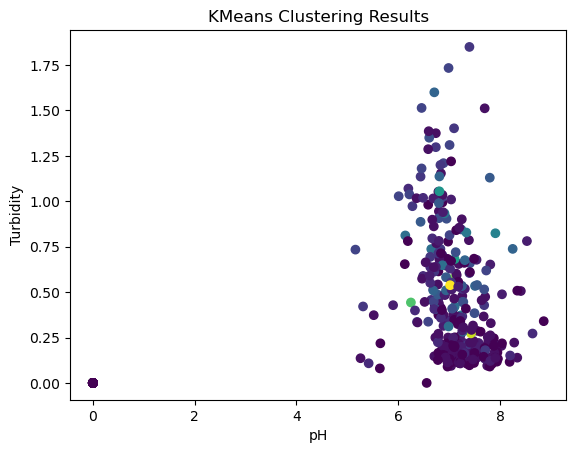

In [212]:
plt.scatter(X['pH'],X['turbidity'],c=X['color'])
plt.xlabel('pH')
plt.ylabel('Turbidity')
plt.title('KMeans Clustering Results')
plt.show()

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X[['pH', 'turbidity']], X['color'], test_size=0.2, random_state=42)


In [214]:
X_test

,pH,turbidity
194,6.88,0.150
34,7.22,0.333
16,0.00,0.000
312,7.11,0.682
58,0.00,0.000
...,...,...
83,6.87,1.035
95,6.98,0.250
193,8.19,0.116
351,7.08,0.407


In [215]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [216]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [217]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 4.723111207698938


In [218]:
new_data = pd.DataFrame({'pH': [7.0, 6.0], 'turbidity': [0.5, 0.3]})
predictions = model.predict(new_data)
print('Predicted color:', predictions)

Predicted color: [2.72235224 1.91643536]


In [219]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [220]:
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 4.723111207698938
Root Mean Squared Error: 2.173272004995909
R-squared: 0.1656045109733395


In [222]:
X1 = X[['pH', 'turbidity']]
y1 = X['color']

In [224]:
y1

1      3
2      0
3      1
4      3
5      4
      ..
363    1
364    2
365    1
366    0
367    0
Name: color, Length: 367, dtype: int64

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


In [226]:
from sklearn.ensemble import RandomForestRegressor

In [227]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [228]:
y_pred = model.predict(X_test)

In [229]:
y_pred

array([ 0.89,  1.66,  0.  ,  2.27,  0.  ,  0.  ,  3.46,  3.69,  1.19,
        1.81,  2.47,  0.97,  4.99,  1.88,  0.67,  0.  ,  4.05,  1.23,
        5.63,  1.91,  3.47,  3.55,  7.3 ,  0.  ,  1.16,  0.  ,  0.9 ,
        3.96,  0.  ,  3.44,  2.12,  1.97,  1.64,  4.98,  0.  ,  6.35,
        7.63,  0.  ,  0.  ,  5.18,  0.51,  4.87,  2.27,  1.42,  0.63,
        1.32,  3.87,  5.24,  3.12,  3.26,  1.11,  1.1 ,  7.34, 10.58,
        0.  ,  4.49,  2.56,  1.5 ,  6.76,  2.83,  0.85,  3.8 ,  0.  ,
        5.74,  0.39,  3.26,  0.49,  1.63,  0.42,  3.78,  1.29,  0.4 ,
        4.55,  0.  ,  1.97,  0.59,  5.  ,  1.66,  7.43,  3.08,  3.46,
        1.64,  6.65,  0.  ,  1.05,  3.65,  4.52,  0.74,  3.46,  1.52,
        0.  ,  5.16,  0.  ,  0.66,  0.43,  0.32,  0.65,  3.52,  0.  ,
        5.54,  0.78,  5.53,  0.  ,  1.97,  0.58,  0.69,  0.39,  7.25,
        0.92, 10.25,  3.35])

In [230]:
from sklearn.metrics import r2_score
print('R-squared score:', r2_score(y_test, y_pred))

R-squared score: -0.2959320812936157


In [233]:
import seaborn as sns

In [241]:
X

,pH,turbidity,color
1,6.87,0.703,3
2,0.00,0.000,0
3,7.14,0.602,1
4,6.49,0.589,3
5,6.37,0.336,4
...,...,...,...
363,7.44,0.292,1
364,7.18,0.530,2
365,7.10,0.464,1
366,0.00,0.000,0


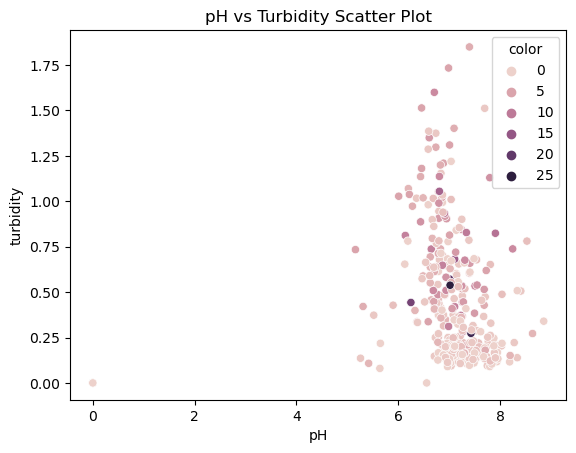

In [242]:
sns.scatterplot(x='pH', y='turbidity', hue='color', data=X)
plt.title('pH vs Turbidity Scatter Plot')
plt.show()

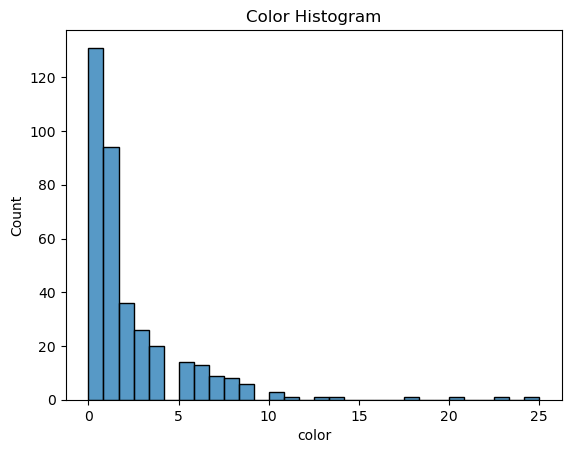

In [243]:
sns.histplot(data=X, x='color')
plt.title('Color Histogram')
plt.show()

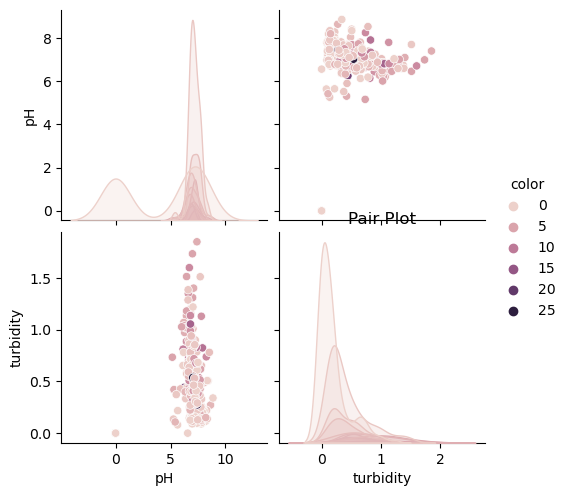

In [244]:
sns.pairplot(data=X, hue='color')
plt.title('Pair Plot')
plt.show()

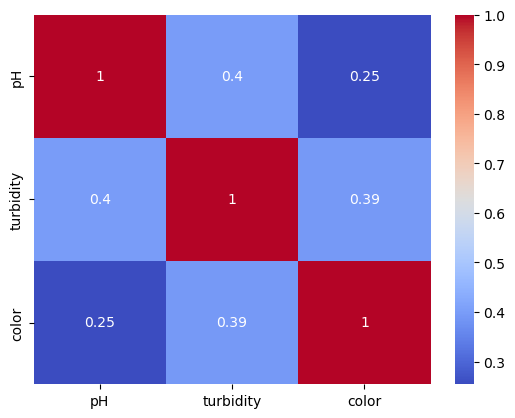

In [245]:
corr_matrix = X.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()